<h1> Binance Data Science & Algorithm Internship Take Home Assessment </h1>

<h2> Part 1 Questions </h2>

- What are the factors that have high correlation with the probability of loan default?
- Are there interaction effects occurring among the variables?
- Any other preliminary analysis of the given dataset?

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install -U scikit-learn

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report
import seaborn as sns

<h2> Load and Explore Datasets </h2>

In [28]:
data = pd.read_csv('../data/cs-training.csv')
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [30]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [31]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

Unnamed: 0           150000	 [1, 2, 3, 4, 5]
SeriousDlqin2yrs         2	 [0, 1]
RevolvingUtilizationOfUnsecuredLines 125728	 [0.0, 8.37e-06, 9.93e-06, 1.25e-05, 1.43e-05]
age                     86	 [0, 21, 22, 23, 24]
NumberOfTime30-59DaysPastDueNotWorse    16	 [0, 1, 2, 3, 4]
DebtRatio            114194	 [0.0, 2.6e-05, 3.69e-05, 3.93e-05, 6.62e-05]
MonthlyIncome        13595	 [0.0, 1.0, 2.0, 4.0, 21.0]
NumberOfOpenCreditLinesAndLoans    58	 [0, 1, 2, 3, 4]
NumberOfTimes90DaysLate    19	 [0, 1, 2, 3, 4]
NumberRealEstateLoansOrLines    28	 [0, 1, 2, 3, 4]
NumberOfTime60-89DaysPastDueNotWorse    13	 [0, 1, 2, 3, 4]
NumberOfDependents      14	 [0.0, 1.0, 2.0, nan, 3.0]


In [32]:
data[data.columns[1:]].corr()['SeriousDlqin2yrs'][:].sort_values(ascending=False)

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046048
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64

<h2> Factors with High Correlation to Loan Default </h2>
From the above data analysis, the factors that have high correlation with the probability of loan default (measured by SeriousDlqln2yrs) are:
<br><br>

○	<b>NumberOfTime30-59DaysPastDueNotWorse:</b> Number of times borrower has been 30-59 days past due but no worse in the last 2 years <br><br>
○	<b>NumberOfTimes90DaysLate:</b> Number of times borrower has been 90 days or more past due <br><br>
○	<b>NumberOfTime60-89DaysPastDueNotWorse:</b> Number of times borrower has been 60-89 days past due but no worse in the last 2 years <br><br>
○	<b>age:</b> Age of borrower in years

<h2> Further Analysis </h2>
Other data preprocessing and visualizations were done to analyze our dataset: <br>
Check outliers and clean the dataset. <br>


In [34]:
data.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
data.loc[data['age'] < 18]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


There is a 0 value entry in the age column. This is an outlier in the dataset, and should be adjusted to prevent data skewness. <br>
Age is assumed to be between 18 and 100 for loans. <br>
When there is a "0" value age, or null value monthly income, these entries will be replaced by the median/ mean value.

In [35]:
data.loc[data['age'] == 0, 'age'] = data['age'].median()
data['MonthlyIncome'] = data['MonthlyIncome'].replace(np.nan,data['MonthlyIncome'].mean())
data['NumberOfDependents'].fillna(data['NumberOfDependents'].median(), inplace=True)

<AxesSubplot: >

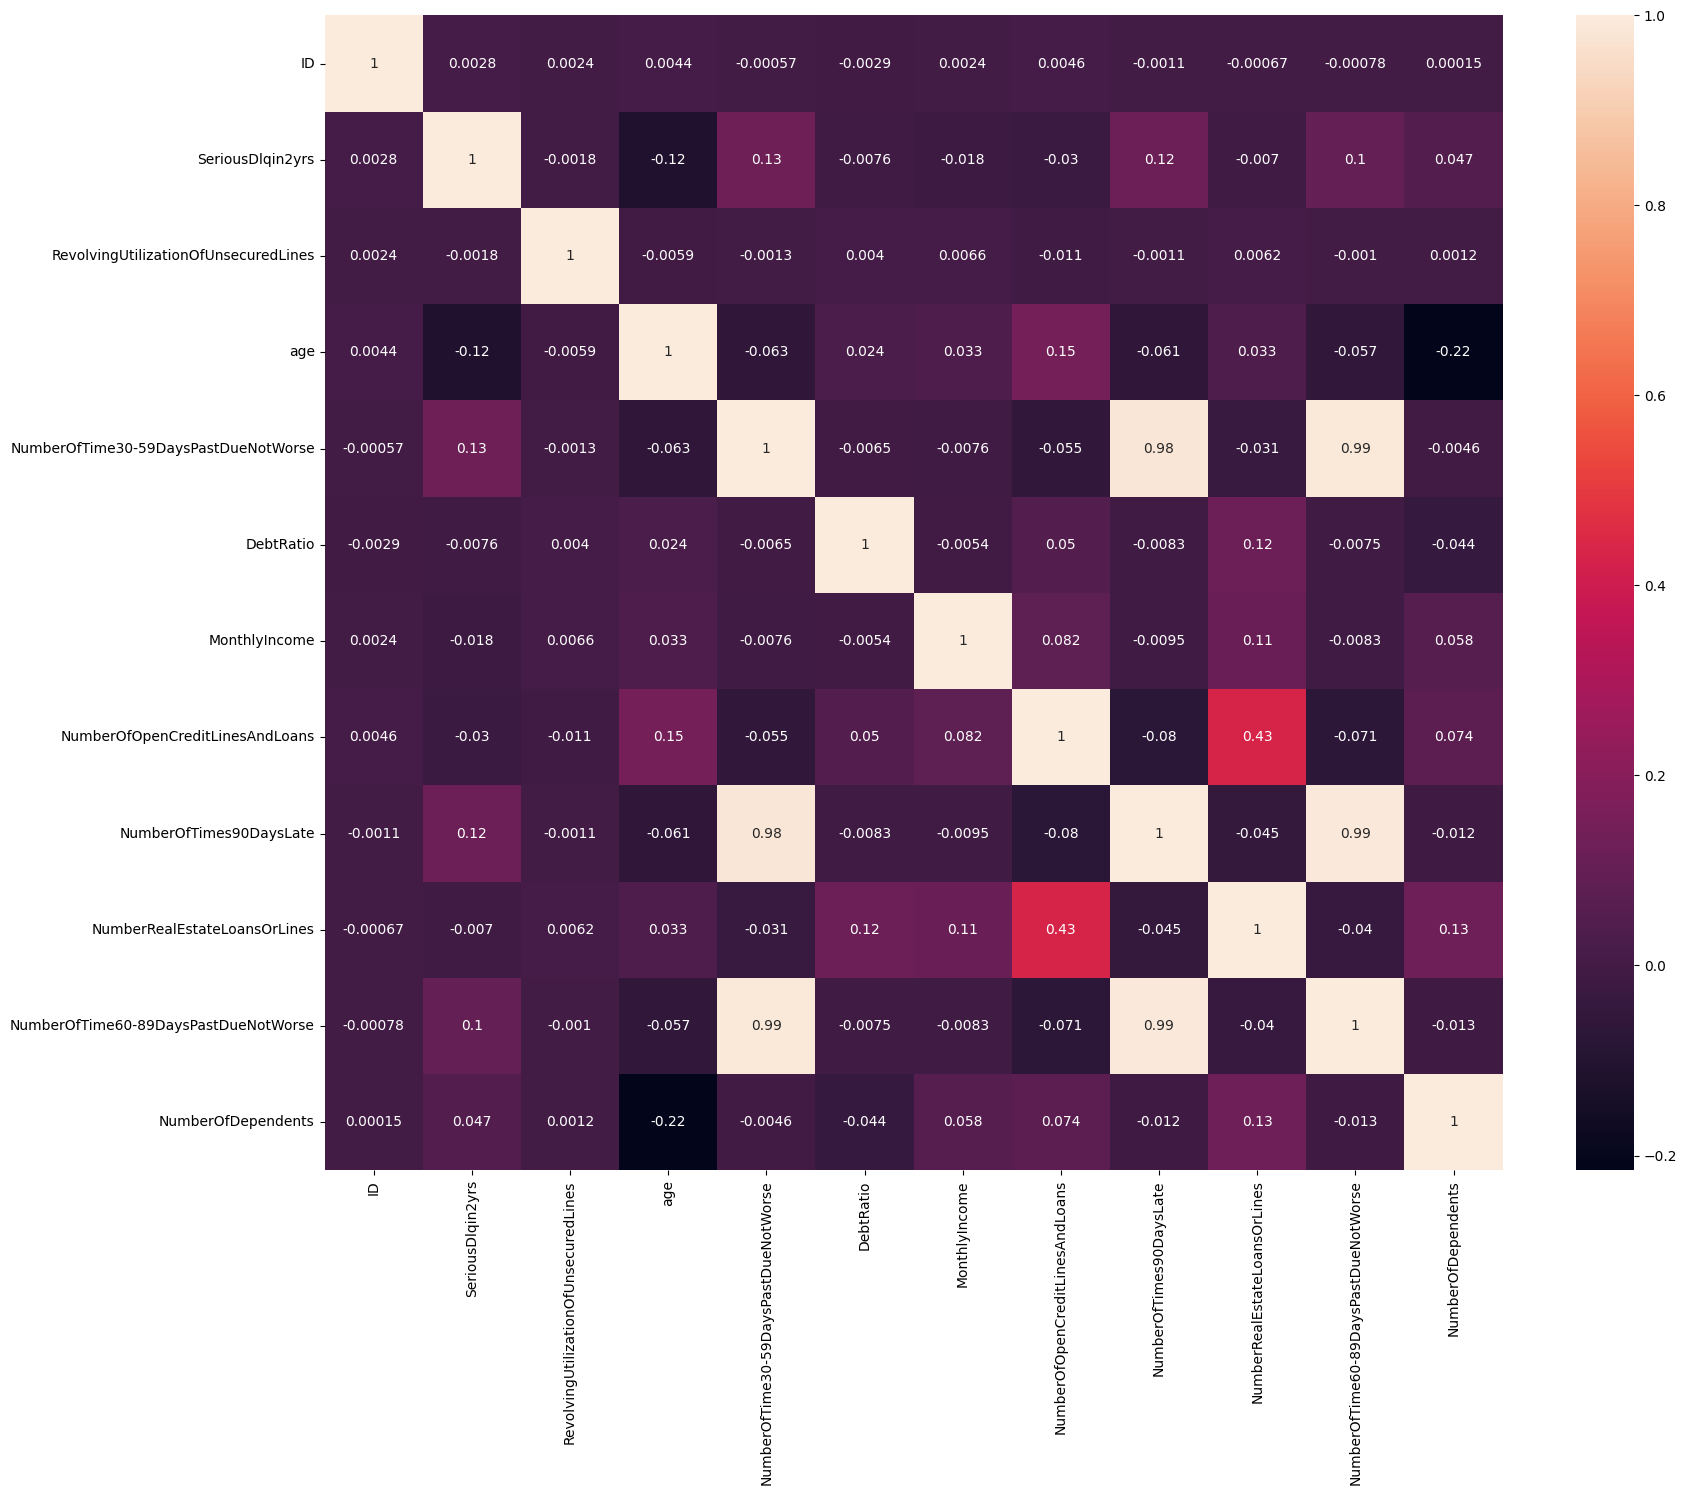

In [36]:
corr = data.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(corr, annot=True)

Here we see that outliers exist in:

- 'NumberOfTime30-59DaysPastDueNotWorse', 
- 'NumberOfTime60-89DaysPastDueNotWorse',
- 'NumberOfTimes90DaysLate'.

Boxplot these features to see where this occurs, then replace outlier values with the median value.

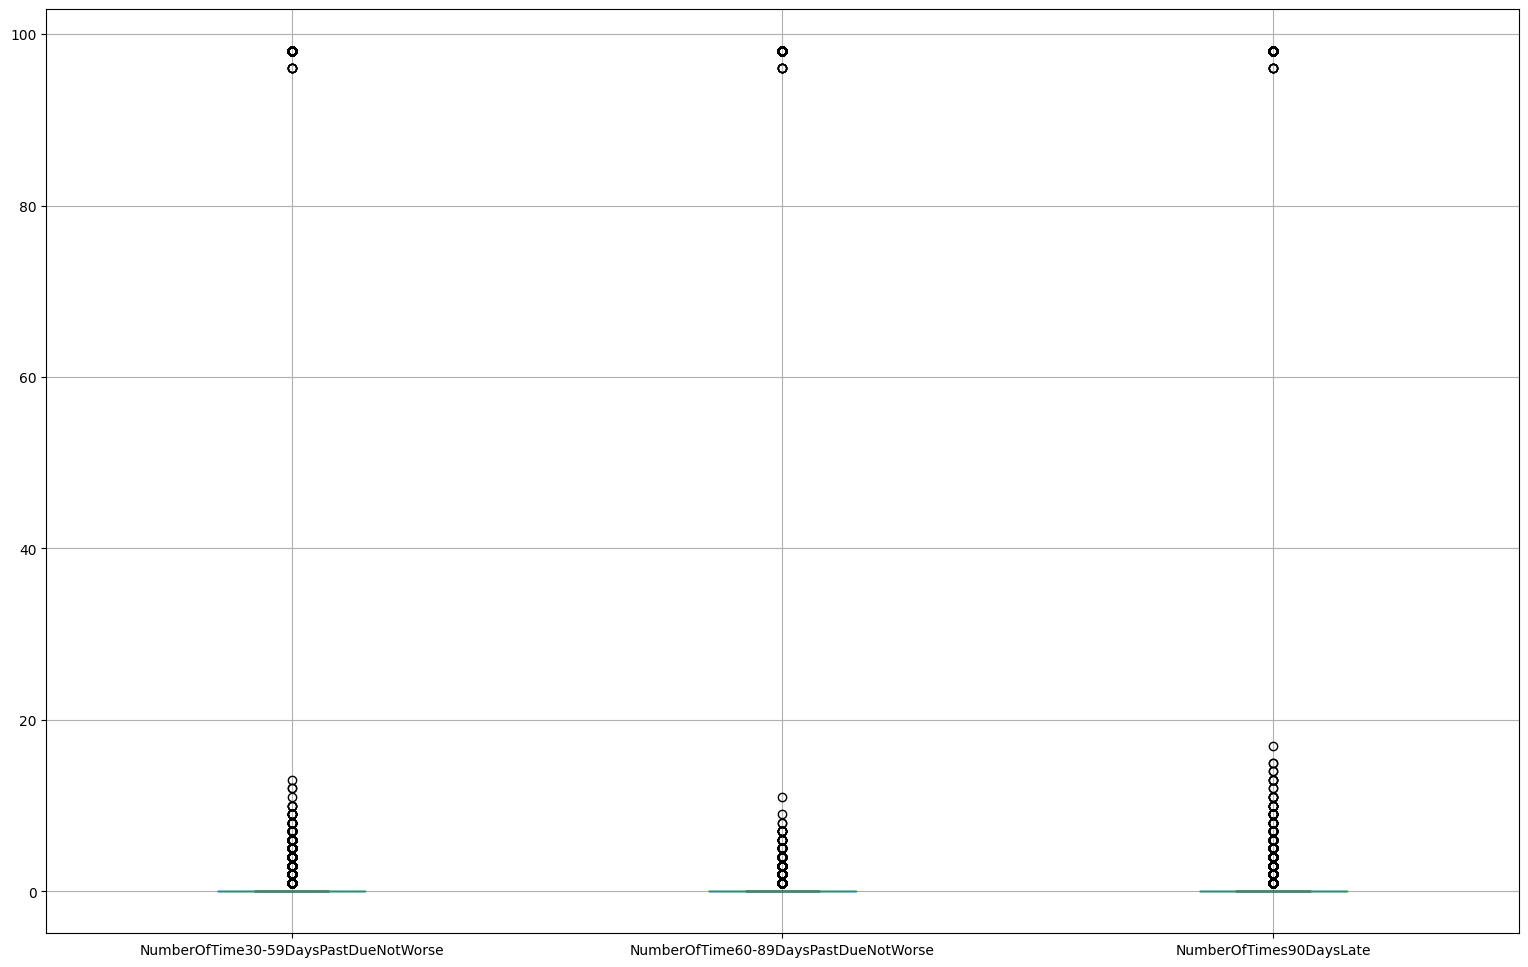

In [24]:
plt.figure(figsize=(19, 12)) 
data[['NumberOfTime30-59DaysPastDueNotWorse', 
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']].boxplot()
plt.show()